# kMeans Clustering and Principal Component Analysis
## Week 2 Practical by Michael Hudson
### kMeans clustering

- Suppose a data set *D*, contains *n* objects, distribute the objects in *D* into *k* clusters
- Distance measures: **Euclidean**, Manhattan, Minkowski
- Minimise within-cluster sum-of-squared error (SSE), but only local optimal will be achieved
- Characteristics of *k*Means:
  - Needs one input parameter
  - Can be scalable on very large data set
  - Sensitive to outliers
  - Flat geometry, distances between objects
  - Suitable for not too many clusters; when *k* is unknown, use [Elbow method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) or [Silhouette analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- *k*Means clustering algorithm
  - Randomly choosing the initial centroids(s)
  - Computing the distance between each object and centroid and assign the object to the closest centroid
  - Computing the within-cluster sum of squared errors and update the centroid of each cluster
  - Iterating the above two steps until the within-cluster sum of squared errors is minimised

  <img src="https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9780123814791/files/images/F000101f10-03-9780123814791.jpg">

  Fig 2. Clustering of a set of objects using the k-means method; for (b) update cluster centers and reassign objects accordingly (the mean of each cluster is marked by a +).

In [25]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat
from IPython.display import Image

### Real world example: Perform image compression using *k*Means
**Random Initialisation**
**Image Compression with *k*Means**

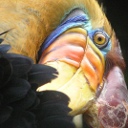

In [26]:
# visualise the data
Image(filename='./data/bird_small.png')

**Load the dataset** `bird_small.mat`

In [27]:
# load the data
data = loadmat('./data/bird_small.mat')
# The matrix 'A' contains the RGB values of the image
A = data['A']

# a 128x128 image with 3 colour channels (RGB)
print(A.shape)  # (128, 128, 3)

(128, 128, 3)


**Reshape the dataset for easier computation**

In [28]:
# Normalise and reshape the image data for k-means clustering
A = A / 255.0  # Normalize pixel values to the range [0, 1]
# Reshape the 3D image array into a 2D array for k-means
X = A.reshape(A.shape[0] * A.shape[1], -1)

print(X.shape)
# Expected output: (16384, 3), where 16384 = 128*128 (total number of pixels)

(16384, 3)


In [29]:
# function to generate random initial centroids
def kMeansInitCentroids(X, K):
    rng = np.random.RandomState(0)
    idx = np.arange(X.shape[0])
    rng.shuffle(idx)
    centroids = X[idx[:K]]
    return centroids

**With 16 clusters, run the kMeans algorithm on the dataset**

In [30]:
# function to recompute the new centroids for each cluster after assignments
def computeCentroids(X, idx, K):
    # Initialize an array to store the new centroids
    # The array has K rows (one for each centroid) and the same number of columns as the dataset X
    centroids = np.zeros((K, X.shape[1]))
    
    # Loop over each cluster index from 0 to K-1
    for i in range(K):
        # Select all data points assigned to the current cluster i
        # The condition idx == i creates a boolean array that is True where the elements of idx match i
        # X[idx == i] selects the rows from X where this condition is True
        # Calculate the mean of the assigned points along each feature dimension
        # np.mean calculates the average across the specified axis (axis=0 computes mean along columns)
        # The resulting mean for each feature becomes the new centroid for this cluster
        centroids[i] = np.mean(X[idx == i], axis=0)
    return centroids

In [42]:
# function to compute the distance between each point and each centroid
def findClosestCentroids(X, centroids):
    # Initialise an array to store the index of the closest centroid for each data point
    idx = np.zeros(X.shape[0])
    
    # Loop over each data point in the dataset X
    for i in range(X.shape[0]):
        # Euclidean distance
        # Calculate the Euclidean distance between the i-th data point and each centroid
        # The operation involves subtracting each centroid from the data point, squaring the result,
        # and summing up all the squares.
        dist = np.sum(np.power(X[i] - centroids, 2), axis=1)
        # Find the index of the centroid with the minimum distance to the i-th data point
        # The np.argmin function returns the index of the smallest value in the distance array,
        # which corresponds to the closest centroid.
        idx[i] = np.argmin(np.sqrt(dist))
        
    # Return the array of indices that indicate the closest centroid for each data point
    # Each index in idx corresponds to the centroid that is closest to the data point at the same index in X.
    return idx

In [37]:
# run kMeans based on maximum number of iterations
def runKmeans(X, initial_centroids, max_iter):
    # Determine the number of clusters K based on the shape of the initial centroids array
    K = initial_centroids.shape[0]
    
    # Set the initial centroids as provided by the user or an automated process
    centroids = initial_centroids
    
    # Iterate over the algorithm for the specified number of maximum iterations
    # This loop continually updates the centroids based on the data points assigned to each cluster
    for i in range(max_iter):
        # Find the closest centroids for each data point
        # idx is an array where each element is the index of the nearest centroid for each data point
        idx = findClosestCentroids(X, centroids)
        
        # Recompute the centroids by calculating the mean of all points assigned to each cluster
        # This step updates the centroids to be the center of all points currently assigned to each cluster
        centroids = computeCentroids(X, idx, K)
        
    # Return the final indices of nearest centroids for each data point and the final centroids
    # The idx array shows the cluster membership for each data point in the dataset X
    # The centroids array contains the coordinates for each centroid after the last iteration
    return idx, centroids

In [43]:
K = 16  # number of clusters
max_iters = 10  # number of iterations
initial_centroids = kMeansInitCentroids(X, K)
idx, centroids = runKmeans(X, initial_centroids, max_iters)
print(idx[:5])
print(centroids[:5])

[0. 0. 0. 0. 0.]
[[0.87105964 0.71310375 0.44781052]
 [0.18825202 0.18365121 0.17592184]
 [0.47697173 0.34930181 0.1956746 ]
 [0.65527778 0.48053105 0.22705474]
 [0.74235017 0.62085688 0.39412359]]


In [44]:
centroids

array([[0.87105964, 0.71310375, 0.44781052],
       [0.18825202, 0.18365121, 0.17592184],
       [0.47697173, 0.34930181, 0.1956746 ],
       [0.65527778, 0.48053105, 0.22705474],
       [0.74235017, 0.62085688, 0.39412359],
       [0.07343631, 0.07981836, 0.06948434],
       [0.86693392, 0.57718509, 0.25871445],
       [0.56730723, 0.48875426, 0.45355134],
       [0.11577909, 0.1241977 , 0.11459102],
       [0.51659078, 0.64663389, 0.8272203 ],
       [0.29860552, 0.26268123, 0.25479551],
       [0.69147534, 0.62305458, 0.57770516],
       [0.81961417, 0.74891841, 0.74348514],
       [0.95487199, 0.83713075, 0.60022262],
       [0.97605466, 0.93821747, 0.79922163],
       [0.41403286, 0.38151563, 0.40527822]])

In [45]:
# convert the features back to 128 x 128
X_recovered = centroids[findClosestCentroids(X, centroids).astype(int)]
X_recovered = X_recovered.reshape(A.shape[0], A.shape[1], A.shape[2])
print(X_recovered.shape)  # (128, 128, 3)

(128, 128, 3)


In [46]:
X_recovered

array([[[0.87105964, 0.71310375, 0.44781052],
        [0.87105964, 0.71310375, 0.44781052],
        [0.87105964, 0.71310375, 0.44781052],
        ...,
        [0.07343631, 0.07981836, 0.06948434],
        [0.07343631, 0.07981836, 0.06948434],
        [0.07343631, 0.07981836, 0.06948434]],

       [[0.87105964, 0.71310375, 0.44781052],
        [0.87105964, 0.71310375, 0.44781052],
        [0.87105964, 0.71310375, 0.44781052],
        ...,
        [0.07343631, 0.07981836, 0.06948434],
        [0.07343631, 0.07981836, 0.06948434],
        [0.07343631, 0.07981836, 0.06948434]],

       [[0.87105964, 0.71310375, 0.44781052],
        [0.87105964, 0.71310375, 0.44781052],
        [0.87105964, 0.71310375, 0.44781052],
        ...,
        [0.07343631, 0.07981836, 0.06948434],
        [0.07343631, 0.07981836, 0.06948434],
        [0.07343631, 0.07981836, 0.06948434]],

       ...,

       [[0.07343631, 0.07981836, 0.06948434],
        [0.07343631, 0.07981836, 0.06948434],
        [0.07343631, 0

**Visualise the dataset**

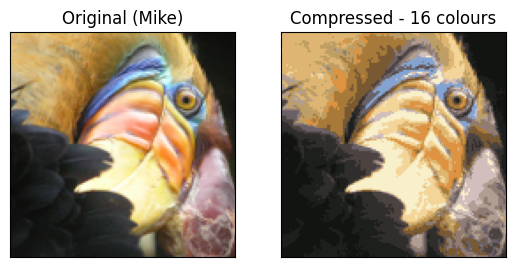

In [48]:
# visualise the compressed image
plt.figure()
plt.subplot(121)
plt.imshow(A)
plt.xticks([])
plt.yticks([])
plt.title('Original (Mike)')
plt.subplot(122)
plt.imshow(X_recovered)
plt.xticks([])
plt.yticks([])
plt.title('Compressed - 16 colours')
plt.show()

### Perform *k*Means clustering on `ex7data2.mat` dataset
**Load** `ex7data2.mat`

In [49]:
# Load the data
data = loadmat('./data/ex7data2.mat')
X = data['X']

# Output the shape of X to verify it loaded correctly
print(X.shape)  # Expected output: (300, 2)

(300, 2)


In [50]:
X

array([[ 1.84207953,  4.6075716 ],
       [ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ],
       [ 2.90401653,  4.61220411],
       [ 3.23197916,  4.93989405],
       [ 1.24792268,  4.93267846],
       [ 1.97619886,  4.43489674],
       [ 2.23454135,  5.05547168],
       [ 2.98340757,  4.84046406],
       [ 2.97970391,  4.80671081],
       [ 2.11496411,  5.37373587],
       [ 2.12169543,  5.20854212],
       [ 1.5143529 ,  4.77003303],
       [ 2.16979227,  5.27435354],
       [ 0.41852373,  4.88312522],
       [ 2.47053695,  4.80418944],
       [ 4.06069132,  4.99503862],
       [ 3.00708934,  4.67897758],
       [ 0.66632346,  4.87187949],
       [ 3.1621865 ,  4.83658301],
       [ 0.51155258,  4.91052923],
       [ 3.1342801 ,  4.96178114],
       [ 2.04974595,  5.6241395 ],
       [ 0.66582785,  5.24399257],
       [ 1.01732013,  4.84473647],
       [ 2.17893568,  5.29758701],
       [ 2.85962615,  5.26041997],
       [ 1.30882588,  5.30158701],
       [ 0.99253246,

**Elbow method - choose K**

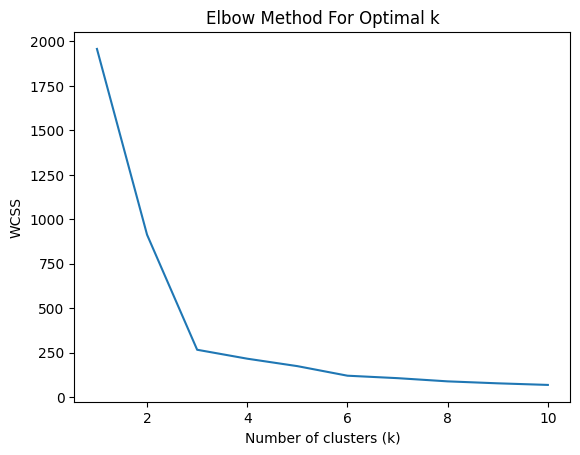

In [51]:
# Implement the Elbow Method to choose K (optimal number of clusters)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# within-cluster sum of squares (WCSS) - measures the total variance within each cluster.
# The smaller the WCSS, the more homogeneous the cluster is.
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # Compute within-cluster sum of squares
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

Assign initial centroids where the number of clusters is 3 and find the closest centroids

**Finding the closest centroid**

In [52]:
# initialise 3 centroids to form 3 clusters with random values
K = 3  # number of clusters

# specify the maximum number of iterations to be 10 as kmeans returns local optimal only
max_iters = 10

# #random centroids
# aer = np.random.rand(K, 2)
# initial_centroids = np.array(aer)

# Use the first three data points as initial centroids instead of predefined points
initial_centroids = X[:K]

In [53]:
# function to compute the distance between each point and each centroid
def findClosestCentroids(X, centroids):
    # Initialise an array to store the index of the closest centroid for each data point
    idx = np.zeros(X.shape[0])
    
    # Loop over each data point in the dataset X
    for i in range(X.shape[0]):
        # Euclidean distance
        # Calculate the Euclidean distance between the i-th data point and each centroid
        # The operation involves subtracting each centroid from the data point, squaring the result,
        # and summing up all the squares.
        dist = np.sum(np.power(X[i] - centroids, 2), axis=1)
        # Find the index of the centroid with the minimum distance to the i-th data point
        # The np.argmin function returns the index of the smallest value in the distance array,
        # which corresponds to the closest centroid.
        idx[i] = np.argmin(np.sqrt(dist))
        
    # Return the array of indices that indicate the closest centroid for each data point
    # Each index in idx corresponds to the centroid that is closest to the data point at the same index in X.
    return idx

In [54]:
idx = findClosestCentroids(X, initial_centroids)
print(idx[:3])  # Display the first 5 assignments to centroids

[0. 1. 2.]


**Run K-means and update centroids**

In [55]:
# run kMeans based on maximum number of iterations
def runKmeans(X, initial_centroids, max_iter):
    # Determine the number of clusters K based on the shape of the initial centroids array
    K = initial_centroids.shape[0]
    
    # Set the initial centroids as provided by the user or an automated process
    centroids = initial_centroids
    
    # Iterate over the algorithm for the specified number of maximum iterations
    # This loop continually updates the centroids based on the data points assigned to each cluster
    for _ in range(max_iter):
        # Step 1: Find the closest centroids for each data point
        idx = findClosestCentroids(X, centroids)

        # Step 2: Compute new centroids based on the mean of the assigned data points
        centroids = computeCentroids(X, idx, K)
        
    # Return the final indices of nearest centroids for each data point and the final centroids
    # The idx array shows the cluster membership for each data point in the dataset X
    # The centroids array contains the coordinates for each centroid after the last iteration
    return idx, centroids

In [56]:
# function to recompute the new centroids for each cluster after assignments
def computeCentroids(X, idx, K):
    # Initialize an array to store the new centroids
    # The array has K rows (one for each centroid) and the same number of columns as the dataset X
    centroids = np.zeros((K, X.shape[1]))
    
    # Loop over each cluster index from 0 to K-1
    for i in range(K):
        # Select all data points assigned to the current cluster i
        # The condition idx == i creates a boolean array that is True where the elements of idx match i
        # X[idx == i] selects the rows from X where this condition is True
        # Calculate the mean of the assigned points along each feature dimension
        # np.mean calculates the average across the specified axis (axis=0 computes mean along columns)
        # The resulting mean for each feature becomes the new centroid for this cluster
        centroids[i] = np.mean(X[idx == i], axis=0)
    return centroids

In [57]:
centroids = computeCentroids(X, idx, K)
print(centroids)

[[2.14349542 3.43826326]
 [4.57911166 4.87731371]
 [5.43504212 2.37956442]]


In [58]:
# run kMeans on the dataset 
idx, centroids = runKmeans(X, centroids, max_iters)

**Visualise the dataset using scatter plot**

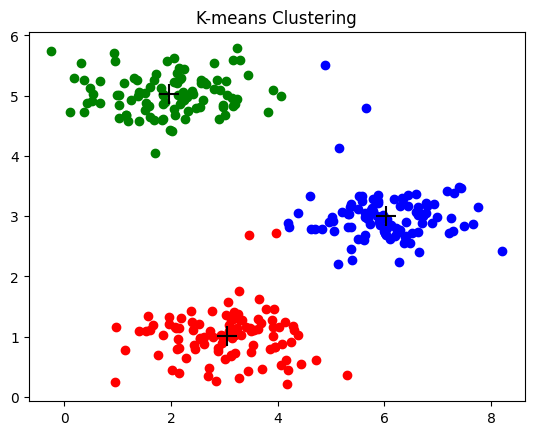

In [60]:
# plot the clusters and mark the centroids
plt.figure()
plt.scatter(X[idx == 0, 0], X[idx == 0, 1], color="red")
plt.scatter(X[idx == 1, 0], X[idx == 1, 1], color="green")
plt.scatter(X[idx == 2, 0], X[idx == 2, 1], color="blue")
plt.scatter(centroids[:, 0], centroids[:, 1], color="black", marker="+", s=200)
plt.title('K-means Clustering')
plt.show()

### Principal Component Analysis

- Unsupervised dimensionality reduction technique
- Uses Singular Value Decomposition (SVD) of the data to project it to a lower dimensional space
- Can be used for denoising and data compression

![Principal Component Analysis](wk2_pca.png "Original data transformed by PCA")

### Real-world example: Perform facial image compression using PCA

**Face Image Dataset**

In [61]:
# Load the data
data = loadmat('./data/ex7faces.mat')
X = data['X']

print(X.shape)  # (5000, 1024)

(5000, 1024)


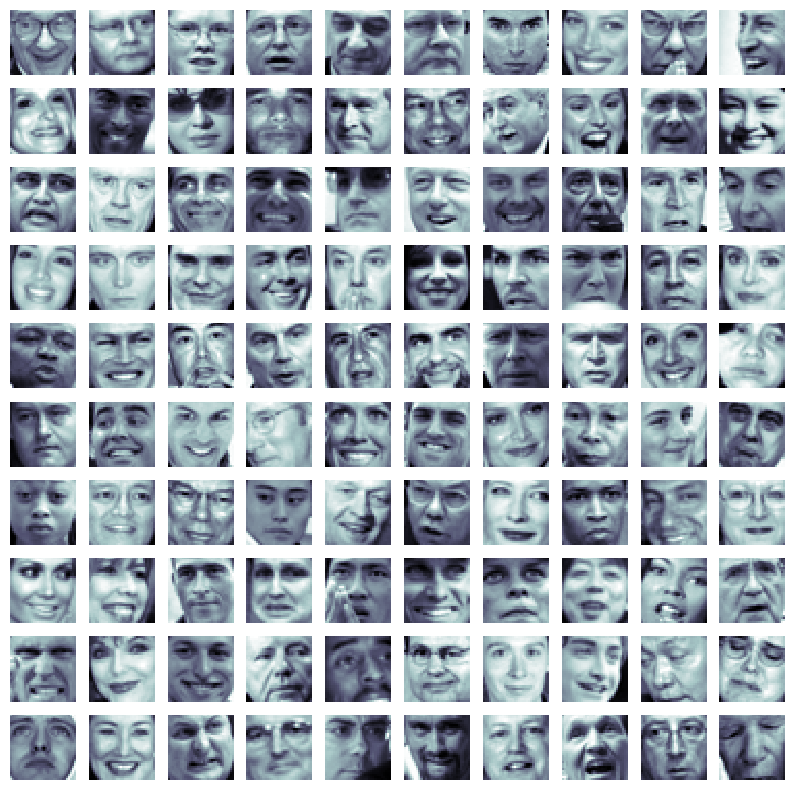

In [65]:
# visualise a sample batch
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X[i].reshape((32, 32)).T, cmap=plt.cm.bone, interpolation='nearest')
    plt.axis('off')
plt.show()

**Normalise the dataset**

In [66]:
# function to normalise the features using z-score normalisation
def featureNormalise(X):
    #Calculate the mean of each feature/column
    mu = np.mean(X, axis=0)
    
    #Calculate the standard deviation of each feature/column, ddof=1 provides sample standard deviation
    sigma = np.std(X, axis=0, ddof=1)

    #Normalise the features using z-score normalisation
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

# svd factorisation: https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html,
# Singular Value Decomposition (SVD) based PCA implementation
# A(input) = USV(h), s contains the singular values of A, u are the eigenvectors of AAh, Vh are the eigenvectors of AhA
def pca(X):
    # Compute the covariance matrix of the normalised features
    # Sigma represents covariance when X is normalised
    Sigma = np.dot(X.T, X) / X.shape[0]
    # Perform SVD on the covariance matrix
    # U will contain the principal components (eigenvectors of the covariance matrix)
    # S will contain the singular values, which are related to the eigenvalues of the covariance matrix
    U, S, _ = np.linalg.svd(Sigma)
    return U, S
    

In [67]:
# apply pca on the data
X_norm, mu, sigma = featureNormalise(X)
U, S = pca(X_norm)

**Visualise U matrix**

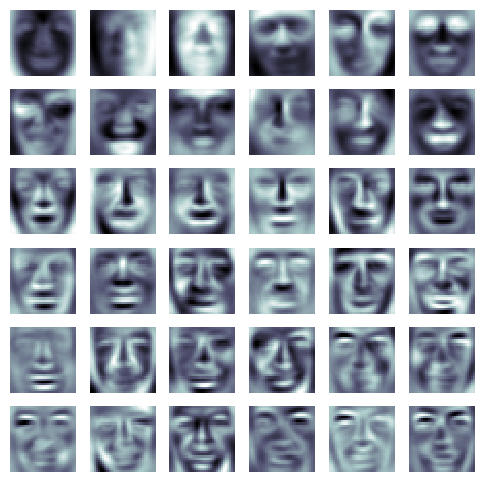

In [68]:
# visualise the sample batch after pca on each dimension
plt.figure(figsize=(6, 6))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.imshow(U[:, i].reshape((32, 32)).T, cmap=plt.cm.bone, interpolation='nearest')
    plt.axis('off')
plt.show()

**Reduce the dimension to 100**

In [69]:
# Function to project original data onto a lower dimensional space defined by the principal components
def projectData(X, U, K):
    Z = np.dot(X, U[:, :K])
    return Z

In [70]:
# project data using 100 principal components
K = 100
Z = projectData(X_norm, U, K)
print(Z.shape)  # (5000, 100)

(5000, 100)


**Reconstruct the original dataset**

In [71]:
# Function to convert principal components back to the original dimension
def recoverData(Z, U, K):
    X_rec = np.dot(Z, U[:, :K].T)
    return X_rec

In [72]:
X_rec = recoverData(Z, U, K)
print(X_rec.shape)  # (5000, 1024)

(5000, 1024)


**Visualise the reconstructed dataset**

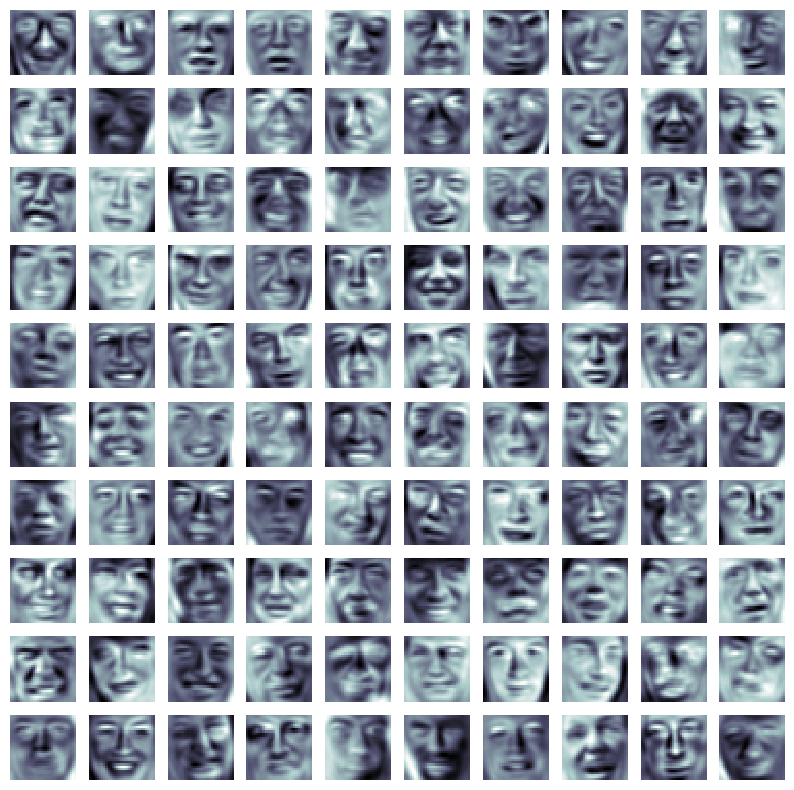

In [73]:
# visualise the sample batch with 100 principal components
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X_rec[i].reshape((32, 32)).T, cmap=plt.cm.bone, interpolation='nearest')
    plt.axis('off')
plt.show()

### Perform PCA on `ex7data1.mat` dataset

**Load the dataset** `ex7data1.mat`

In [ ]:
data = loadmat('./data/ex7data1.mat')
X = data['X']
print(X.shape)  # Expected output: (50, 2)

(50, 2)


**Visualise the dataset using the scatterplot**

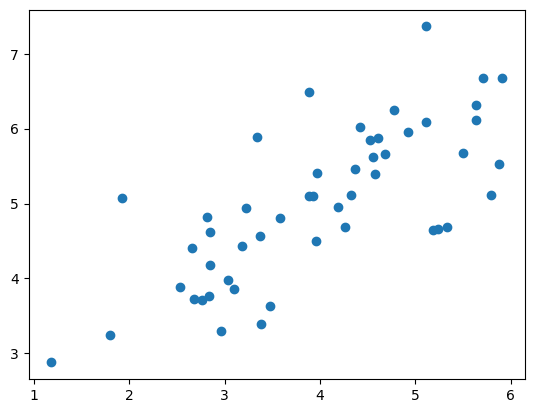

In [75]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.show()

**PCA Algorithm**

In [ ]:
# function to normalise the features using z-score normalisation
def featureNormalise(X):
    #Calculate the mean of each feature/column
    mu = np.mean(X, axis=0)
    
    #Calculate the standard deviation of each feature/column, ddof=1 provides sample standard deviation
    sigma = np.std(X, axis=0, ddof=1)

    #Normalise the features using z-score normalisation
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

# svd factorisation: https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html,
# Singular Value Decomposition (SVD) based PCA implementation
# A(input) = USV(h), s contains the singular values of A, u are the eigenvectors of AAh, Vh are the eigenvectors of AhA
def pca(X):
    # Compute the covariance matrix of the normalised features
    # Sigma represents covariance when X is normalised
    Sigma = np.dot(X.T, X) / X.shape[0]
    # Perform SVD on the covariance matrix
    # U will contain the principal components (eigenvectors of the covariance matrix)
    # S will contain the singular values, which are related to the eigenvalues of the covariance matrix
    U, S, _ = np.linalg.svd(Sigma)
    return U, S

**Normalise the dataset and apply the PCA**

In [76]:
X_norm, mu, sigma = featureNormalise(X)
U, S = pca(X_norm)

In [79]:
print(U[:, 0])

[-0.70710678 -0.70710678]


**Visualise the dataset**

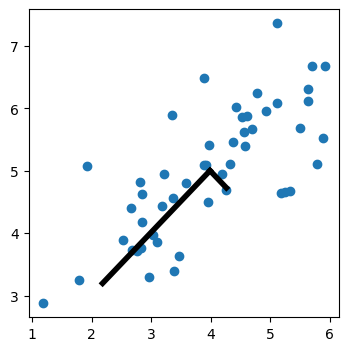

In [81]:
# major trends in the data captured by PCA
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1])
plt.plot(
    [mu[0], mu[0] + 1.5 * S[0] * U[0, 0]],
    [mu[1], mu[1] + 1.5 * S[0] * U[1, 0]],
    color='black', linewidth=4
)
plt.plot(
    [mu[0], mu[0] - 1.5 * S[1] * U[0, 1]],
    [mu[1], mu[1] - 1.5 * S[1] * U[1, 1]],
    color='black', linewidth=4
)
plt.show()

**Dimensionality Reduction with PCA**

In [82]:
# Function to project original data onto a lower dimensional space defined by the principal components
def projectData(X, U, K):
    Z = np.dot(X, U[:, :K])
    return Z

**Reduce the dimension of dataset to 1**

In [83]:
# Specify the number of principal components to retain
K = 1

# Project the normalized data X_norm onto the top K (1 in this case) principal components
Z = projectData(X_norm, U, K)

# Print the first element of the projected data to see the new feature representation
print(Z[0])

[1.48127391]


**Reconstruct the dataset to the original dimension**

In [84]:
# Function to convert principal components back to the original dimension
def recoverData(Z, U, K):
    X_rec = np.dot(Z, U[:, :K].T)
    return X_rec

In [85]:
# Reconstruct the dataset from the principal components
X_rec = recoverData(Z, U, K)
print(X_rec[0])

[-1.04741883 -1.04741883]


**Visualise both reduced dataset and original dataset**

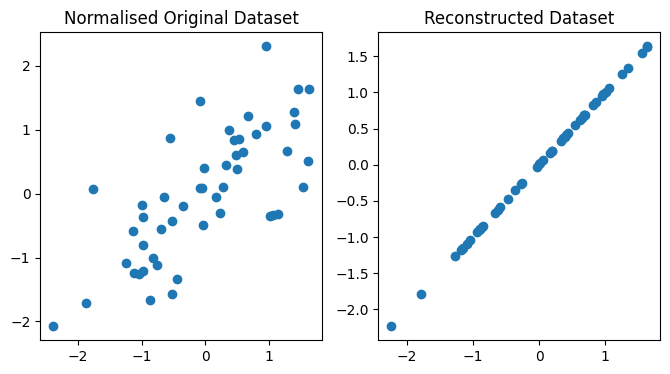

In [86]:
# Visualising the reduced dataset and reconstructed dataset
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(X_norm[:, 0], X_norm[:, 1])
plt.title('Normalised Original Dataset')
plt.subplot(122)
plt.scatter(X_rec[:, 0], X_rec[:, 1])
plt.title('Reconstructed Dataset')
plt.show()